In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score , silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score , adjusted_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# df.dtypes

In [5]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [6]:
# df.tail()

In [7]:
# df.info()

In [8]:
col_num=0
TotalObjects =df.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in df:
    nullCount =df[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 30 :
        col_num=col_num+1
        df.drop(x, axis=1,inplace=True)
        print(str(x)+"\t\t\t\t\t "+str(nullPercent))
        print ("A total of "+str(col_num)+" deleted !")

Column					 Null Values%


In [9]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [10]:
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df.drop_duplicates(subset=['customerID'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# MultipleLine Vs churning customers

In [12]:
sns.set(color_codes=True)

In [13]:
churncount = df.groupby("MultipleLines").count().sort_values(by='Churn',ascending=False)["Churn"]

In [14]:
churncount

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: Churn, dtype: int64

In [15]:
colors = ['#FF0000', '#0000FF', '#FFFF00',
          '#ADFF2F', '#FFA500']

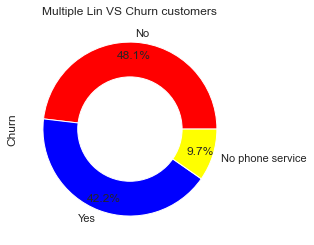

In [16]:
churncount.plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Multiple Lin VS Churn customers')
plt.show()

# Internet Service Vs Churning Customer

In [17]:
churncount2 = df.groupby("InternetService").count().sort_values(by='Churn',ascending=False)["Churn"]

In [18]:
churncount2

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: Churn, dtype: int64

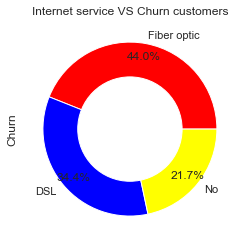

In [19]:
churncount2.plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Internet service VS Churn customers')
plt.show()

# Payment Method vs Churning Customers

In [20]:
churncount3 = df.groupby("PaymentMethod").count().sort_values(by='Churn',ascending=False)["Churn"]
churncount3



PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Churn, dtype: int64

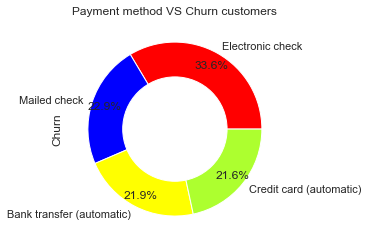

In [21]:
churncount3.plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Payment method VS Churn customers')
plt.show()



# Phone Service Vs Churning Customers

In [22]:
churncount4 = df.groupby("PhoneService").count().sort_values(by='Churn',ascending=False)["Churn"]
churncount4



PhoneService
Yes    6361
No      682
Name: Churn, dtype: int64

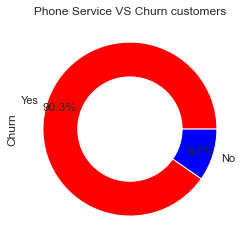

In [23]:
churncount4.plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Phone Service VS Churn customers')
plt.show()



In [24]:
df.drop(['Dependents'], axis=1, inplace=True)

In [25]:
def getGender(str):
    if str=="Male":
        return 1
    else:
        return 2
    
def getPartner(str):
    if str=="Yes":
        return 1
    else:
        return 2
    
# def getDependents(str):
#     if str=="Yes":
#         return 1
#     else:
#         return 2
def getPhoneService(str):
    if str=="Yes":
        return 1
    else:
        return 2
def getMultipleLines(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getInternetService(str):
    if str=="DSL":
        return 1
    elif str == "Fiber optic":
        return 2
    else:
        return 3
def getOnlineSecurity(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getOnlineBackup(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getDeviceProtection(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getTechSupport(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getStreamingTV(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getStreamingMovies(str):
    if str=="Yes":
        return 1
    elif str == "No":
        return 2
    else:
        return 3
def getContract(str):
    if str=="Month-to-month":
        return 1
    elif str == "Two year":
        return 2
    else:
        return 3
def getPaperlessBilling(str):
    if str=="Yes":
        return 1
    else:
        return 2
def getPaymentMethod(str):
    if str=="Electronic check":
        return 1
    elif str == "Mailed check":
        return 2
    elif str == "Bank transfer (automatic)":
        return 3
    else:
         return 4
    
df["gender"]= df["gender"].apply(getGender)
df["Partner"]= df["Partner"].apply(getPartner)
# df["Dependents"]= df["Dependents"].apply(getDependents)
df["PhoneService"]= df["PhoneService"].apply(getPhoneService)
df["MultipleLines"]= df["MultipleLines"].apply(getMultipleLines)
df["InternetService"]= df["InternetService"].apply(getInternetService)
df["OnlineSecurity"] = df["OnlineSecurity"].apply(getOnlineSecurity)
df["OnlineBackup"]= df["OnlineBackup"].apply(getOnlineBackup)
df["DeviceProtection"]= df["DeviceProtection"].apply(getDeviceProtection)
df["TechSupport"]= df["TechSupport"].apply(getOnlineBackup)
df["StreamingTV"]= df["StreamingTV"].apply(getStreamingTV)
df["StreamingMovies"]= df["StreamingMovies"].apply(getStreamingMovies)
df["Contract"]= df["Contract"].apply(getContract)
df["PaperlessBilling"]= df["PaperlessBilling"].apply(getPaperlessBilling)
df["PaymentMethod"] = df["PaymentMethod"].apply(getPaymentMethod)


In [26]:
# df['SeniorCitizen']=df['SeniorCitizen'].replace(to_replace=1,value=2)
df['SeniorCitizen']=df['SeniorCitizen'].replace(to_replace=0,value=2)

In [27]:
df.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.495244,1.837853,1.516967,32.371149,1.096834,1.674996,1.872923,1.930001,1.871788,1.872781,1.926452,1.832316,1.828766,1.658952,1.407781,2.315633,64.761692
std,0.500013,0.368612,0.499748,24.559481,0.295752,0.642730,0.737796,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.801943,0.491457,1.148907,30.090047
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.250000
25%,1.000000,2.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.500000
50%,1.000000,2.000000,2.000000,29.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,70.350000
75%,2.000000,2.000000,2.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,89.850000
max,2.000000,2.000000,2.000000,72.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,118.750000


In [28]:
df.head(100)

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,2,1,1,2,3,1,2,1,2,2,2,2,1,1,1,29.85,29.85,No
1,5575-GNVDE,1,2,2,34,1,2,1,1,2,1,2,2,2,3,2,2,56.95,1889.5,No
2,3668-QPYBK,1,2,2,2,1,2,1,1,1,2,2,2,2,1,1,2,53.85,108.15,Yes
3,7795-CFOCW,1,2,2,45,2,3,1,1,2,1,1,2,2,3,2,3,42.30,1840.75,No
4,9237-HQITU,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,2,2,2,12,1,1,2,1,2,2,2,2,2,1,1,1,78.95,927.35,Yes
96,9803-FTJCG,1,2,1,71,1,1,1,1,1,2,1,2,2,3,1,4,66.85,4748.7,No
97,0278-YXOOG,1,2,2,5,1,2,3,3,3,3,3,3,3,1,2,2,21.05,113.85,Yes
98,3212-KXOCR,1,2,2,52,1,2,3,3,3,3,3,3,3,2,2,3,21.00,1107.2,No


In [29]:
sum(df.isnull().sum())

0

<AxesSubplot:>

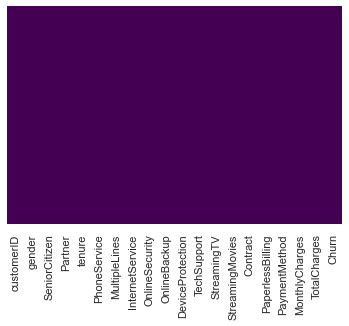

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
count_nan = df['TotalCharges'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0


In [32]:
# df.head(100)

In [33]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [34]:
result = df.dtypes
result

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
df.fillna(df.mean(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_17680\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [36]:
# df['TotalCharges'].isnull().sum()

In [37]:
# df['TotalCharges'].isnull().values.any()

# Relationship Analysis

In [38]:
corelation = df.corr()

<AxesSubplot:>

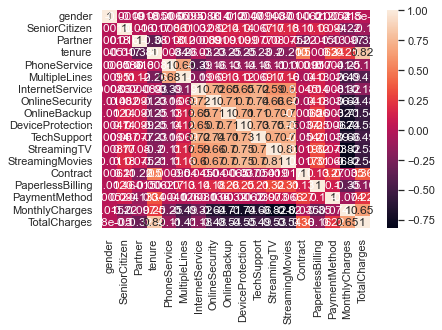

In [39]:
sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [40]:
#Finding the rows with value 'Yes'
df3=df.loc[df['Churn'].str.contains('es')]

In [41]:
df3.head(100)

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,1,2,2,2,1,2,1,1,1,2,2,2,2,1,1,2,53.85,108.15,Yes
4,9237-HQITU,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,1,70.70,151.65,Yes
5,9305-CDSKC,2,2,2,8,1,1,2,2,2,1,2,1,1,1,1,1,99.65,820.50,Yes
8,7892-POOKP,2,2,1,28,1,1,2,2,2,1,1,1,1,1,1,1,104.80,3046.05,Yes
13,0280-XJGEX,1,2,2,49,1,1,2,2,1,1,2,1,1,1,1,3,103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0259-GBZSH,1,2,2,2,1,1,2,2,2,2,2,1,2,1,1,1,85.65,181.50,Yes
377,9601-BRXPO,2,2,1,25,1,1,2,2,2,1,1,1,1,1,1,3,104.95,2566.50,Yes
381,6905-NIQIN,1,2,2,1,1,2,1,2,1,2,2,2,2,1,2,2,50.65,50.65,Yes
383,5167-ZFFMM,1,2,2,1,1,1,2,2,1,2,2,2,1,1,1,4,90.85,90.85,Yes


In [42]:
from sklearn import preprocessing  
def starndadize_data(df):
    '''Starndardize the numerical values in the input data frame
    Args:
       df: data frame that need to standardize
    Returns:
       df: data frame with starndardize numerical variables
    '''
   
    print('Assign the numeric values list in the data frame into num_col')     
    num_col = list(df.select_dtypes(include=np.number).columns)
    
    print('Replace null values with Zero')
    df[num_col] = df[num_col].fillna(0)
   
    print('Starndadize the numerical variables')
    df[num_col] = preprocessing.StandardScaler().fit_transform(df[num_col])
    
    return df 

In [43]:
df6 = starndadize_data(df)
df6.head()

Assign the numeric values list in the data frame into num_col
Replace null values with Zero
Starndadize the numerical variables


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1.009559,0.439916,-1.034530,-1.277445,3.054010,2.061669,-1.183234,0.099148,-1.180777,0.172426,0.10386,0.22154,0.225767,-0.821752,-0.829798,-1.145198,-1.160323,-0.994971,No
1,5575-GNVDE,-0.990532,0.439916,0.966622,0.066327,-0.327438,0.505697,-1.183234,-1.317281,0.173655,-1.182926,0.10386,0.22154,0.225767,1.672366,1.205113,-0.274744,-0.259629,-0.173876,No
2,3668-QPYBK,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.10386,0.22154,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399,Yes
3,7795-CFOCW,-0.990532,0.439916,0.966622,0.514251,3.054010,2.061669,-1.183234,-1.317281,0.173655,-1.182926,-1.30827,0.22154,0.225767,1.672366,1.205113,0.595711,-0.746535,-0.195400,No
4,9237-HQITU,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.10386,0.22154,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193,Yes


In [44]:
df7=df6.loc[df6['Churn'].str.contains('es')]

In [45]:
df7.head(100)

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399,Yes
4,9237-HQITU,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193,Yes
5,9305-CDSKC,1.009559,0.439916,0.966622,-0.992402,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,0.103860,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.159546,-0.645874,Yes
8,7892-POOKP,1.009559,0.439916,-1.034530,-0.177995,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,-1.308270,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,1.330711,0.336779,Yes
13,0280-XJGEX,-0.990532,0.439916,0.966622,0.677133,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,0.103860,-1.099631,-1.092706,-0.821752,-0.829798,0.595711,1.294151,1.215539,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0259-GBZSH,-0.990532,0.439916,0.966622,-1.236724,-0.327438,-1.050276,0.172250,0.099148,0.173655,0.172426,0.103860,-1.099631,0.225767,-0.821752,-0.829798,-1.145198,0.694243,-0.928013,Yes
377,9601-BRXPO,1.009559,0.439916,-1.034530,-0.300156,-0.327438,-1.050276,0.172250,0.099148,0.173655,-1.182926,-1.308270,-1.099631,-1.092706,-0.821752,-0.829798,0.595711,1.335696,0.125042,Yes
381,6905-NIQIN,-0.990532,0.439916,0.966622,-1.277445,-0.327438,0.505697,-1.183234,0.099148,-1.180777,0.172426,0.103860,0.221540,0.225767,-0.821752,1.205113,-0.274744,-0.469015,-0.985788,Yes
383,5167-ZFFMM,-0.990532,0.439916,0.966622,-1.277445,-0.327438,-1.050276,0.172250,0.099148,-1.180777,0.172426,0.103860,0.221540,-1.092706,-0.821752,-0.829798,1.466165,0.867069,-0.968038,Yes


# Decision Tree

In [46]:
drop_vars = ["customerID","Churn"]
x = df6.drop(drop_vars, axis=1)

In [47]:

x

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.009559,0.439916,-1.034530,-1.277445,3.054010,2.061669,-1.183234,0.099148,-1.180777,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-1.145198,-1.160323,-0.994971
1,-0.990532,0.439916,0.966622,0.066327,-0.327438,0.505697,-1.183234,-1.317281,0.173655,-1.182926,0.10386,0.221540,0.225767,1.672366,1.205113,-0.274744,-0.259629,-0.173876
2,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-0.274744,-0.362660,-0.960399
3,-0.990532,0.439916,0.966622,0.514251,3.054010,2.061669,-1.183234,-1.317281,0.173655,-1.182926,-1.30827,0.221540,0.225767,1.672366,1.205113,0.595711,-0.746535,-0.195400
4,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.197365,-0.941193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,0.439916,-1.034530,-0.340876,-0.327438,-1.050276,-1.183234,-1.317281,0.173655,-1.182926,-1.30827,-1.099631,-1.092706,1.672366,-0.829798,-0.274744,0.665992,-0.129281
7039,1.009559,0.439916,-1.034530,1.613701,-0.327438,-1.050276,0.172250,0.099148,-1.180777,-1.182926,0.10386,-1.099631,-1.092706,1.672366,-0.829798,1.466165,1.277533,2.242808
7040,1.009559,0.439916,-1.034530,-0.870241,3.054010,2.061669,-1.183234,-1.317281,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-1.145198,-1.168632,-0.855182
7041,-0.990532,-2.273159,-1.034530,-1.155283,-0.327438,-1.050276,0.172250,0.099148,0.173655,0.172426,0.10386,0.221540,0.225767,-0.821752,-0.829798,-0.274744,0.320338,-0.872777


In [48]:
result = x.dtypes
result

gender              float64
SeniorCitizen       float64
Partner             float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [49]:
y=df6['Churn']

In [50]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [52]:
x_train.shape

(4930, 18)

In [53]:
x_test.shape

(2113, 18)

In [54]:
x_test

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3782,1.009559,0.439916,0.966622,-0.829521,-0.327438,-1.050276,0.172250,0.099148,0.173655,0.172426,0.103860,-1.099631,0.225767,-0.821752,-0.829798,-1.145198,0.641065,-0.581388
71,1.009559,0.439916,-1.034530,0.799294,-0.327438,0.505697,1.527734,1.515577,1.528087,1.527778,1.515989,1.542710,1.544241,1.672366,-0.829798,-1.145198,-1.474403,-0.526594
5864,1.009559,0.439916,-1.034530,0.595692,-0.327438,0.505697,1.527734,1.515577,1.528087,1.527778,1.515989,1.542710,1.544241,0.425307,1.205113,0.595711,-1.499330,-0.601257
3425,1.009559,0.439916,-1.034530,-0.177995,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.103860,0.221540,0.225767,1.672366,-0.829798,0.595711,0.187394,-0.128530
813,-0.990532,0.439916,-1.034530,0.066327,3.054010,2.061669,-1.183234,-1.317281,0.173655,0.172426,0.103860,0.221540,0.225767,1.672366,1.205113,0.595711,-1.142043,-0.593707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,-0.990532,0.439916,-1.034530,1.613701,3.054010,2.061669,-1.183234,-1.317281,0.173655,-1.182926,-1.308270,-1.099631,-1.092706,0.425307,1.205113,0.595711,-0.126685,1.000402
1560,-0.990532,0.439916,0.966622,0.269929,3.054010,2.061669,-1.183234,-1.317281,0.173655,0.172426,-1.308270,-1.099631,0.225767,1.672366,1.205113,0.595711,-0.655137,-0.217543
4981,-0.990532,0.439916,0.966622,-0.748080,3.054010,2.061669,-1.183234,0.099148,0.173655,-1.182926,0.103860,-1.099631,-1.092706,-0.821752,-0.829798,-1.145198,-0.465692,-0.693449
1561,-0.990532,0.439916,0.966622,-1.277445,-0.327438,-1.050276,0.172250,0.099148,0.173655,0.172426,0.103860,0.221540,0.225767,-0.821752,-0.829798,-1.145198,0.338618,-0.975058


In [55]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
pred =model.predict(x_test)
pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [57]:
y_test

3782     No
71       No
5864     No
3425     No
813      No
       ... 
1352     No
1560     No
4981    Yes
1561    Yes
3157    Yes
Name: Churn, Length: 2113, dtype: object

In [58]:
accuracy_score(y_test,pred)

0.7349739706578324

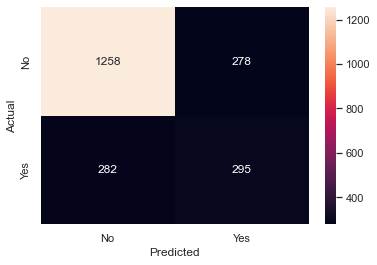

In [59]:
 
confusion_matrix1 = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix1, annot=True,fmt="d")

#     print(df_kpi)
plt.show()


# Random Forest

In [60]:
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [61]:
pred1 = model.predict(x_test)
pred1

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [62]:
accuracy_score(y_test,pred1)

0.7936583057264552

In [63]:
confusion_matrix(y_test,pred1)

array([[1397,  139],
       [ 297,  280]], dtype=int64)

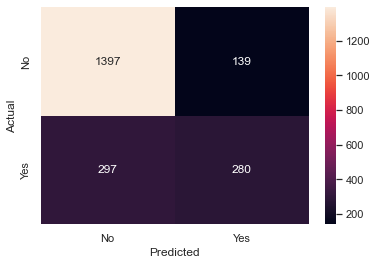

In [64]:
confusion_matrix1 = pd.crosstab(y_test, pred1, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix1, annot=True,fmt="d")

#     print(df_kpi)
plt.show()

# K-nearest 

In [65]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [66]:
x = df.iloc[:,1:18]
x.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1.009559,0.439916,-1.034530,-1.277445,3.054010,2.061669,-1.183234,0.099148,-1.180777,0.172426,0.10386,0.22154,0.225767,-0.821752,-0.829798,-1.145198,-1.160323
1,-0.990532,0.439916,0.966622,0.066327,-0.327438,0.505697,-1.183234,-1.317281,0.173655,-1.182926,0.10386,0.22154,0.225767,1.672366,1.205113,-0.274744,-0.259629
2,-0.990532,0.439916,0.966622,-1.236724,-0.327438,0.505697,-1.183234,-1.317281,-1.180777,0.172426,0.10386,0.22154,0.225767,-0.821752,-0.829798,-0.274744,-0.362660
3,-0.990532,0.439916,0.966622,0.514251,3.054010,2.061669,-1.183234,-1.317281,0.173655,-1.182926,-1.30827,0.22154,0.225767,1.672366,1.205113,0.595711,-0.746535
4,1.009559,0.439916,0.966622,-1.236724,-0.327438,0.505697,0.172250,0.099148,0.173655,0.172426,0.10386,0.22154,0.225767,-0.821752,-0.829798,-1.145198,0.197365


In [67]:
y = df6.iloc[:,-1]
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [68]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
pred3 = model.predict(x_test)
pred3[0:18]

array(['Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [70]:
# In real data set 
y_test[0:18]

3782     No
71       No
5864     No
3425     No
813      No
1185    Yes
2249     No
1020     No
3722     No
7004     No
4004     No
7039     No
4620     No
4907     No
4133     No
1489     No
4008     No
3210     No
Name: Churn, dtype: object

In [71]:
accuracy = accuracy_score(y_test,pred3)
accuracy

0.7160435399905348

In [72]:
cm = confusion_matrix(y_test,pred3)
cm

array([[1239,  297],
       [ 303,  274]], dtype=int64)

In [73]:
result = pd.DataFrame(data=[y_test.values,pred3], index = ['y_test','pred3'])
result.transpose()

,y_test,pred3
0,No,Yes
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
2108,No,No
2109,No,No
2110,Yes,Yes
2111,Yes,Yes


In [74]:
# Find best K value

correct_sum = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    correct = np.sum(pred3 == y_test)
    correct_sum.append(correct)

In [75]:
correct_sum

[1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513,
 1513]

In [76]:
result = pd.DataFrame(data=correct_sum)
result.index = result.index+1
result.T

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,...,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513


In [77]:
model = KNeighborsClassifier(n_neighbors = 23)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [78]:
accuracy_score(y_test,pred3)

0.7160435399905348

In [79]:
print("Accuracy of model at K=23 is",accuracy_score(y_test,pred3))

Accuracy of model at K=23 is 0.7160435399905348


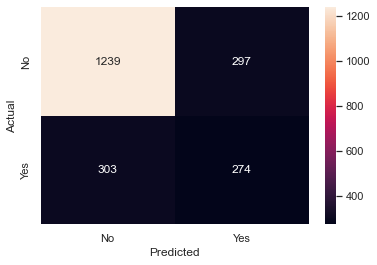

In [80]:
confusion_matrix1 = pd.crosstab(y_test, pred3, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix1, annot=True,fmt="d")

# print(df_kpi)
plt.show()

# Logistic Regression

In [81]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [82]:
pred2 = model.predict(x_test)
pred2

array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [83]:
accuracy = accuracy_score(y_test,pred2)
accuracy

0.7946048272598202

In [84]:
cm = confusion_matrix(y_test,pred2)
cm

array([[1396,  140],
       [ 294,  283]], dtype=int64)

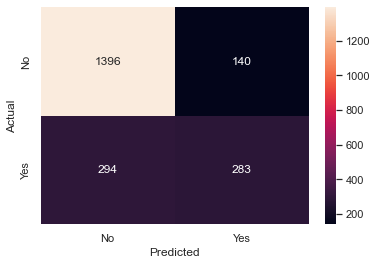

In [85]:
confusion_matrix1 = pd.crosstab(y_test, pred2, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix1, annot=True,fmt="d")


#print(df_kpi)
plt.show()

In [86]:
final_data = pd.DataFrame({'Models': ['LR','KNN','DT','RF'],'ACC':[accuracy_score(y_test,pred2),
                                                                        accuracy_score(y_test,pred3),
                                                                        accuracy_score(y_test,pred),
                                                                        accuracy_score(y_test,pred1)]})

In [87]:
final_data

,Models,ACC
0,LR,0.794605
1,KNN,0.716044
2,DT,0.783720
3,RF,0.793658


<AxesSubplot:xlabel='Models', ylabel='ACC'>

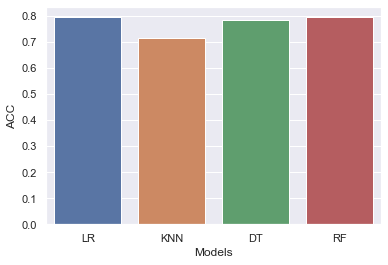

In [88]:
sns.barplot(x ='Models', y ='ACC', data = final_data)